# Colab 환경 설정

In [1]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install torch
!pip install transformers==3.0.2
!pip install folium==0.2.1
!pip install -U --no-cache-dir gdown --pre

     |████████████████████████████████| 47.3 MB 1.4 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 344 kB 8.2 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595736 sha256=bfa443dcde7fda3ae1e85819d86ed406871af4f591ffc2a33fbd64cde82886a7
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
     |████████████████████████████████| 1.2 MB 7.0 MB/s 
     |████████████████████████████████| 769 kB 7.9 MB/s 
     |████████████████████████████████| 895 kB 2.2 MB/s 
     |████████████████████████████████| 3.0 MB 45.7 MB/s 
     |████████████████████████████████| 69 kB 5.3 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=4285aa820e0404b265fc46d743374edadaabad0f0850325a1b

In [2]:
#깃허브에서 KoBERT 파일 로드
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-75s8q1gr
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-75s8q1gr
     |████████████████████████████████| 132 kB 7.5 MB/s 
     |████████████████████████████████| 4.5 MB 72.2 MB/s 
     |████████████████████████████████| 4.0 MB 55.0 MB/s 
     |████████████████████████████████| 77 kB 8.7 MB/s 
     |████████████████████████████████| 6.5 MB 55.8 MB/s 
     |████████████████████████████████| 596 kB 57.0 MB/s 
     |████████████████████████████████| 8.7 MB 57.0 MB/s 
     |████████████████████████████████| 79 kB 11.2 MB/s 
     |████████████████████████████████| 127 kB 77.2 MB/s 
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15674 sha256=295cd702037b83fcf0381fd2514b1ed351fcdb6ae3987c740798f7e0c7d3bb8d
  Stored in directory: /tmp/pip-ephem-wheel-cache-oub4eo1v/wheels/d3/68/ca/334747dfb038313b49cf71f84832a33372f3470d9ddfd0

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp  # http://freesearch.pe.kr/archives/4963
import numpy as np
from tqdm.notebook import tqdm

In [4]:
#kobert
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
## huggingface로 kobert 접근
# from transformers import AutoTokenizer, AutoModel
# tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1")
# model = AutoModel.from_pretrained("skt/kobert-base-v1")

In [5]:
#GPU 사용
device = torch.device("cuda:0")

In [6]:
#BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


[KoBERT vocab](https://github.com/Beomi/KcBERT/blob/master/kcbert-base/vocab.txt)

In [9]:
!pip install -U --no-cache-dir gdown --pre

In [10]:
print("Downloading 한국어_단발성_대화_데이터셋.xlsx...")
!gdown --id {"1zNXGQJSJRKJpCyrKYTwkqmCN6aucnsFp"} -O 한국어_단발성_대화_데이터셋.xlsx

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1zNXGQJSJRKJpCyrKYTwkqmCN6aucnsFp 



In [11]:
import pandas as pd
data = pd.read_excel('/content/한국어_단발성_대화_데이터셋.xlsx')
data.head()

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,5898.0
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,5665.0
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,5267.0
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,4830.0
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,6037.0


In [12]:
data.loc[(data['Emotion'] == "공포"), 'Emotion'] = 0  #공포 => 0
data.loc[(data['Emotion'] == "놀람"), 'Emotion'] = 1  #놀람 => 1
data.loc[(data['Emotion'] == "분노"), 'Emotion'] = 2  #분노 => 2
data.loc[(data['Emotion'] == "슬픔"), 'Emotion'] = 3  #슬픔 => 3
data.loc[(data['Emotion'] == "중립"), 'Emotion'] = 4  #중립 => 4
data.loc[(data['Emotion'] == "행복"), 'Emotion'] = 5  #행복 => 5
data.loc[(data['Emotion'] == "혐오"), 'Emotion'] = 6  #혐오 => 6

In [14]:
data_list = []
for q, label in zip(data['Sentence'], data['Emotion']):
    data_tmp = []
    data_tmp.append(q)
    data_tmp.append(str(label))

    data_list.append(data_tmp)

In [15]:
data_list[:5]

[['언니 동생으로 부르는게 맞는 일인가요..??', '0'],
 ['그냥 내 느낌일뿐겠지?', '0'],
 ['아직너무초기라서 그런거죠?', '0'],
 ['유치원버스 사고 낫다던데', '0'],
 ['근데 원래이런거맞나요', '0']]

In [16]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.25, random_state=0)

In [17]:
print(len(dataset_train))
print(len(dataset_test))

28945
9649


In [18]:
dataset_train[0]

['그냥 멋져유 ~요리할땐 더 멋져유~기부했다고 들었을땐 더더더 멋져부러유~~^^', '5']

In [20]:
# 데이터를 train data와 test data로 나누었다면 각 데이터가 
# KoBERT 모델의 입력으로 들어갈 수 있는 형태가 되도록 토큰화, 
# 정수 인코딩, 패딩 등을 해주어야 한다. 
# 예시 코드에 입력데이터의 형태가 되도록 해주는 클래스가 있어서 
# 동일하게 코드를 작성해주었다.
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer,
                 max_len, pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))


코드를 보면, 위에서 import 해주었던 BERTSentenceTransform 이라는 모듈을 사용한다.    
모듈을 통해 토큰화와 패딩진행

그리고나서 하이퍼 파라미터들을 조정해준다. Batch size는 64, epochs는 5, learning rate는 5e-5로 설정해주었다. 사실 파라미터의 값은 정답이 없고 가장 좋은 성능을 내는 값을 찾아가는 것이 좋다. 하지만 난 그냥 예시 코드에 있는 값들을 동일하게 설정해주었다.(아래에서)

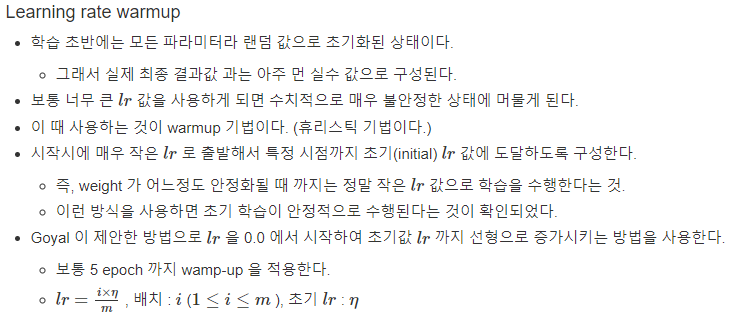

In [21]:
# Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1 
num_epochs = 5
max_grad_norm = 1  # 그래디언트 클리핑(https://wikidocs.net/61375)
log_interval = 200
learning_rate = 5e-5

In [22]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
data_train[0]

(array([   2, 1189,  517, 6188, 7245, 7063,  517,  463, 3486, 7836, 5966,
        1698,  517, 6188, 7245, 7063,  517,  463, 1281, 7870, 1801, 6885,
        7088, 5966, 1698, 5837, 5837,  517, 6188, 7245, 6398, 6037, 7063,
         517,  463,  517,  463,  517,  364,  517,  364,    3,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(42, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 5)

- 3개의 array가 출력되는데, 첫 번째는 패딩된 시퀀스, 두 번째는 길이와 타입에 대한 내용, 세 번재는 어텐션 마스크 시퀀스


In [23]:
# torch 형식의 dataset을 생성
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=2)

In [24]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=7,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), 
                              attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [25]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [26]:
for name, param in model.named_parameters(): 
    print(f'name:{name}') 
    print(type(param)) 
    print(f'param.shape:{param.shape}') 
    print(f'param.requries_grad:{param.requires_grad}') 
    print('=====')

name:bert.embeddings.word_embeddings.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([8002, 768])
param.requries_grad:True
=====
name:bert.embeddings.position_embeddings.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([512, 768])
param.requries_grad:True
=====
name:bert.embeddings.token_type_embeddings.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([2, 768])
param.requries_grad:True
=====
name:bert.embeddings.LayerNorm.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([768])
param.requries_grad:True
=====
name:bert.embeddings.LayerNorm.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([768])
param.requries_grad:True
=====
name:bert.encoder.layer.0.attention.self.query.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([768, 768])
param.requries_grad:True
=====
name:bert.encoder.layer.0.attention.self.query.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Si

In [27]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [29]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

  0%|          | 0/453 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.7826642990112305 train acc 0.3125
epoch 1 batch id 201 loss 1.3046820163726807 train acc 0.4331467661691542
epoch 1 batch id 401 loss 1.2243613004684448 train acc 0.4679317331670823
epoch 1 train acc 0.47292965199324766


  0%|          | 0/151 [00:00<?, ?it/s]

epoch 1 test acc 0.5357037268549805


  0%|          | 0/453 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.09665048122406 train acc 0.609375
epoch 2 batch id 201 loss 1.0822582244873047 train acc 0.5642101990049752
epoch 2 batch id 401 loss 0.9549905061721802 train acc 0.5865414588528678
epoch 2 train acc 0.5912300350603817


  0%|          | 0/151 [00:00<?, ?it/s]

epoch 2 test acc 0.5560485369644547


  0%|          | 0/453 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.8338605165481567 train acc 0.703125
epoch 3 batch id 201 loss 0.8616161346435547 train acc 0.6578047263681592
epoch 3 batch id 401 loss 0.836198091506958 train acc 0.6766677057356608
epoch 3 train acc 0.680901830931048


  0%|          | 0/151 [00:00<?, ?it/s]

epoch 3 test acc 0.5537635998107853


  0%|          | 0/453 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.623394250869751 train acc 0.75
epoch 4 batch id 201 loss 0.6010938286781311 train acc 0.7447139303482587
epoch 4 batch id 401 loss 0.5510851740837097 train acc 0.7575202618453866
epoch 4 train acc 0.7591911764705882


  0%|          | 0/151 [00:00<?, ?it/s]

epoch 4 test acc 0.5561203372077308


  0%|          | 0/453 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.4015211760997772 train acc 0.84375
epoch 5 batch id 201 loss 0.4829210937023163 train acc 0.7996735074626866
epoch 5 batch id 401 loss 0.5411947965621948 train acc 0.8022911471321695
epoch 5 train acc 0.8019615958966367


  0%|          | 0/151 [00:00<?, ?it/s]

epoch 5 test acc 0.5543929078253818


In [30]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()
    
    print('입력문장: ',predict_sentence)
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()

            if np.argmax(logits) == 0:
                test_eval.append("공포가")
            elif np.argmax(logits) == 1:
                test_eval.append("놀람이")
            elif np.argmax(logits) == 2:
                test_eval.append("분노가")
            elif np.argmax(logits) == 3:
                test_eval.append("슬픔이")
            elif np.argmax(logits) == 4:
                test_eval.append("중립이")
            elif np.argmax(logits) == 5:
                test_eval.append("행복이")
            elif np.argmax(logits) == 6:
                test_eval.append("혐오가")

        print(">> 입력하신 내용에서 " + test_eval[0] + " 느껴집니다.")

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [31]:
predict('밥은 먹고 다니냐?')

입력문장:  밥은 먹고 다니냐?


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


>> 입력하신 내용에서 분노가 느껴집니다.


In [32]:
predict('삽질 했다')

입력문장:  삽질 했다


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


>> 입력하신 내용에서 중립이 느껴집니다.


In [33]:
predict('캠퍼스내 취식 금지')

입력문장:  캠퍼스내 취식 금지


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


>> 입력하신 내용에서 혐오가 느껴집니다.
